In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('disCleaned.csv')
df.info()
df.head()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   disappearance  34 non-null     object 
 1   2000           34 non-null     float64
 2   2001           34 non-null     float64
 3   2002           34 non-null     float64
 4   2003           34 non-null     float64
 5   2004           34 non-null     float64
 6   2005           34 non-null     float64
 7   2006           34 non-null     float64
 8   2007           34 non-null     float64
 9   2008           34 non-null     float64
 10  2009           34 non-null     float64
 11  2010           34 non-null     float64
 12  2011           34 non-null     float64
 13  2012           34 non-null     float64
 14  2013           34 non-null     float64
 15  2014           34 non-null     float64
 16  2015           34 non-null     float64
 17  2016           34 non-null     float64
 18  2017        

,disappearance,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,874.731279,1012.663974,926.026869,719.572364,995.823775,772.066135,612.470646,846.815657,907.886818,885.715848,902.854329,1117.345643,1269.019458,1249.0,0.0,0.0,0.0,0.0,0.0
1,Belgium,1133.360563,884.233268,1484.300964,1579.418571,1396.235438,1158.037756,1537.413085,1103.118346,649.930516,934.292881,870.665179,934.468749,914.636559,1245.0,0.0,0.0,0.0,0.0,0.0
2,Bulgaria,275.084816,350.399596,340.568697,397.314698,364.190796,430.013986,420.382519,364.189968,444.717889,409.275903,395.357991,359.519751,375.941251,419.0,0.0,0.0,0.0,0.0,0.0
3,Croatia,327.123995,336.767996,354.862995,375.427996,370.009547,373.753059,386.132852,386.334464,377.142185,365.637529,369.838593,367.153143,360.364120,387.0,0.0,0.0,0.0,0.0,0.0
4,Cyprus,66.796997,52.891097,51.378797,53.095997,59.812396,69.647505,55.495666,69.284049,77.293095,75.437867,73.905648,80.793525,85.398320,89.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1978.263304,2055.005380,2065.774837,2132.612932,2194.215996,2153.509307,2194.003789,2219.055560,2212.674108,2167.366528,2233.255714,2229.554027,2242.030502,2305.882353,1102.911765,1127.088235,1172.558824,1195.823529,1206.431793
std,3604.792965,3743.579295,3652.693403,3865.009684,4018.306377,3925.228589,3921.956362,3970.438805,4096.299707,4048.768126,4116.853588,4161.412146,4152.272249,4350.125186,4255.621960,4369.527264,4519.653568,4667.533632,4719.410405
min,8.810502,9.084398,8.834243,10.562217,15.523023,16.278455,28.811926,15.906515,22.747117,14.123640,12.027799,15.557007,20.997838,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209.635851,244.763782,244.453729,213.757411,268.026386,243.463157,245.083907,279.130479,323.372708,238.612020,310.372430,250.805028,223.632776,262.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,672.318176,727.717443,771.070696,721.805823,790.444509,783.307871,795.253872,808.928780,730.532068,753.015118,809.330489,830.412493,838.651628,865.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1862.265526,2080.388437,2044.326119,2112.472338,2205.365742,2182.304922,2094.860177,2107.659513,1591.706320,1783.978934,1953.554586,1806.969227,1797.710208,1658.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18745.563718,19553.653807,19124.510913,20192.677643,20972.762919,20997.544039,20667.379580,21033.273104,21652.427006,21435.967112,21783.457919,22043.891384,22231.663715,23417.000000,23767.000000,24438.000000,25243.000000,26183.000000,26514.327404


In [3]:
#picking year 2013 because the data are missing for most country from 2014 onwards

X = df.iloc[:34,[1,14]]
print(X)

            2000     2013
0     874.731279   1249.0
1    1133.360563   1245.0
2     275.084816    419.0
3     327.123995    387.0
4      66.796997     89.0
5     560.226396    637.0
6     790.643989    822.0
7      97.338603    120.0
8     967.218994   1095.0
9    5402.080678   5707.0
10   8769.880653   9378.0
11    687.435658   1101.0
12    632.937172    177.0
13     83.158199    196.0
14   5149.236346   5634.0
15    161.794837     95.0
16    173.243675    197.0
17    144.159996    241.0
18      8.810502     22.0
19   1859.771680   1625.0
20   2045.587692   1669.0
21    646.394092    840.0
22    551.025995    891.0
23    263.315742    328.0
24    172.664142    184.0
25   2991.363838   3234.0
26   1173.089486   1175.0
27   2342.282593   2828.0
28   6625.659910   7435.0
29    657.200694    763.0
30   1863.096808   3648.0
31    826.930028   1123.0
32    191.742555    429.0
33  18745.563718  23417.0


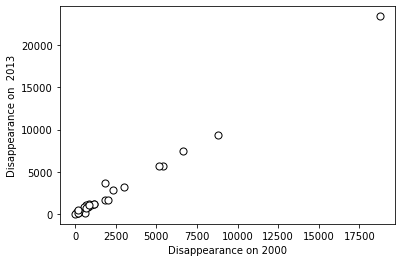

In [4]:
x_= df.iloc[:34,1]
y_= df.iloc[:34,14]
plt.scatter(
   x_, y_,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Disappearance on 2000")
plt.ylabel("Disappearance on  2013")
plt.show()

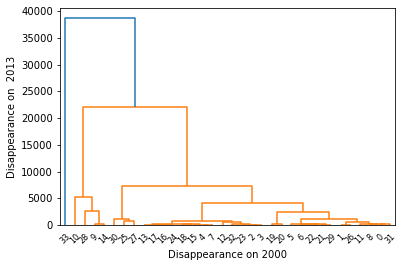

In [5]:
data = list(zip(df.iloc[:34,1],df.iloc[:34,14]))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel("Disappearance on 2000")
plt.ylabel("Disappearance on  2013")
plt.show()

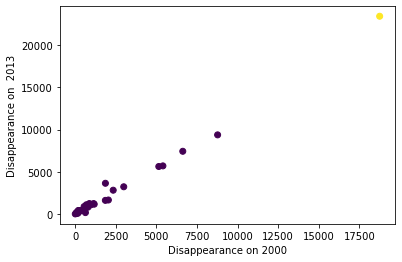

In [6]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(df.iloc[:34,1],df.iloc[:34,14], c=labels)
plt.xlabel("Disappearance on 2000")
plt.ylabel("Disappearance on  2013")
plt.show()

In [8]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

print("Davies Bouldin Score:", davies_bouldin_score(X, labels))
print("Calinski Harabasz Score:", calinski_harabasz_score(X, labels))
print("Silhouette Score:", silhouette_score(X, labels))

Davies Bouldin Score: 0.07803877309220124
Calinski Harabasz Score: 78.70906498823159
Silhouette Score: 0.8586619588202701
